# Analysing The AI Tools Market

This jupyter notebook downloads and explore the data on applications of AI presented by theresanaiforthat.com

There are approx 8,000 records to analyse. Although being nicley tabulated, the records don't use easily yield to traditional querying because there are so many tags (2370) and task names (2147) listed in the table.
so, we embed descriptions of record and use HDBSCAN to suggest how the data naturally clusters, we won't impose our own number of clusters.
Likely there will still be many clusters, so we'll look at using the cluster tree to suggest how they may be grouped. If that is tree too complex (hint, it is), then we'll ask GPT4 to summarise the clusters into a handful for presentation.

The below code was a co-operation between myself (Oliver Morris) and GTP4 Advanced Analytics (GPT4AA). I have marked the code written or adapted from GPT4AA using '##### GPT4AA ######'. If not marked  as GPT4AA, then I wrote the chunk. Note, GPT4AA still required me to know the next logical step, it simply issues chunks of code following a little chat and a data example which I provide in markdown.

In [ ]:
import os
import pandas as pd
from bs4 import BeautifulSoup

# Working directory and environment keys
os.chdir("/home/oliver/Documents/LangChain/ProductDevelopment/MoreClusters")
cwd = os.getcwd()
print(cwd)


In [ ]:
import requests

# Load the data, currently in a html file
if os.path.exists(expanded_path):
    # Load the file
    with open(expanded_path, "r", encoding="utf-8") as file:
        html_content = file.read()
    print("File loaded successfully.")


File loaded successfully.


In [ ]:
##### GPT4AA ######
# GPT4AA wrote all of this, no intervention required from me
# Really helped me with a package I havn't used for three years, the scraping package beautfiful soup.

def extract_relevant_data(html_content):
    # Parse the HTML using BeautifulSoup
    soup = BeautifulSoup(html_content, 'html.parser')

    # Extract data
    data = []
    for task in soup.find_all('div', class_='task'):
        task_name = task.find('a', class_='task_name')
        if task_name:
            task_name = task_name.text
            for li in task.find_all('li'):
                name = li.get('data-name', '')
                link = li.get('data-url', '')
                use_case_element = li.find('a', class_='use_case')
                use_case = use_case_element.text if use_case_element else ''
                tags = [tag.text for tag in li.find_all('span', class_='tag')]
                saves_element = li.find('div', class_='saves')
                saves = saves_element.text if saves_element else ''
                pricing_element = li.find('a', class_='ai_launch_date')
                pricing = pricing_element.text if pricing_element else ''
                data.append([task_name, name, link, use_case, ', '.join(tags), saves, pricing])

    # Convert data to a DataFrame
    df = pd.DataFrame(data, columns=['Task Name', 'Name', 'Link', 'Use Case', 'Tags', 'Saves', 'Pricing'])

    return df


In [ ]:

# File paths
input_file_path  = "tools.html"
output_file_path = "tools_data.xlsx"

# Load the HTML content from the file
with open(input_file_path, 'r', encoding='utf-8') as file:
    full_html_content = file.read()

# Extract the relevant data
df_extracted = extract_relevant_data(full_html_content)

# Save the extracted data to a xlsx file using a semicolon separator
df_extracted.to_excel(output_file_path)

# lets view the data
df_extracted


,Task Name,Name,Link,Use Case,Tags,Saves,Pricing
0,A/B testing,Indiezebra,https://indiezebra.com/,Product launch optimization.,"A/B testing, test, ProductHunt, launch, waitlist",32,No pricing
1,ADHD chatbot,Comigo,https://www.comigo.ai/,ADHD cognitive support for personal task manag...,"ADHD, chatbot, Q&A, conversation",42,No pricing
2,AI app integration,Buildship,https://buildship.com/,Simplified backend workflow development with v...,"apps, integration, development, workflow, Free...",4,Free + from $25/mo
3,AI app integration,Glide Apps,https://www.glideapps.com/ai,Custom app development and integration.,"apps, integration, development, Free + from $2...",14,Free + from $25/mo
4,AI app integration,Intellapi,https://intellapi.com/,Developer capabilities integration.,"apps, integration, development, Free + from $1...",20,Free + from $1.99/month
...,...,...,...,...,...,...,...
7774,3D printer monitoring,Printnanny,https://printnanny.ai/,Automated 3D printer quality control.,"3D, printer, monitor",2,No pricing
7775,3D printer monitoring,Octoeverywhere,https://octoeverywhere.com/gadget,Detects 3D printing errors and notifies users.,"3D, printer, monitor, assistant, Free",6,Free
7776,3D reconstruction,Neuralangelo by Nvidia,https://blogs.nvidia.com/blog/2023/06/01/neura...,3D models from 2D videos for diverse industries.,"3D, video, image",39,No pricing
7777,3D scenes from images,Scene Dreamer,https://scene-dreamer.github.io/,Generated 3D landscapes from 2D images.,"3D, image, animation, video",39,No pricing


In [ ]:
# We explore the data, something which the AI team are not so adept at.

# we could cluster by tags. How many unique tags are there?

# Extracting tags from the sample data
tags_list = df_extracted['Tags'].to_list()

# Splitting each string of tags by comma, flattening the list and converting to set
all_tags = set(tag.strip() for tags in tags_list for tag in tags.split(','))

# Counting the number of unique tags
num_unique_tags = len(all_tags)
num_unique_tags

2370

In [ ]:
# Can we use task names, how many of those are there?

task_names = df_extracted.groupby(['Task Name']).size().reset_index(name='Number of Members').sort_values(by='Number of Members', ascending=False)
task_names

,Task Name,Number of Members
978,Image generation,332
489,Content generation,204
307,ChatGPT,170
2107,Writing,165
371,Chatbots,126
...,...,...
1120,Legal translations,1
1119,Legal summaries,1
1118,Legal drafting,1
1117,Legal documents summaries,1


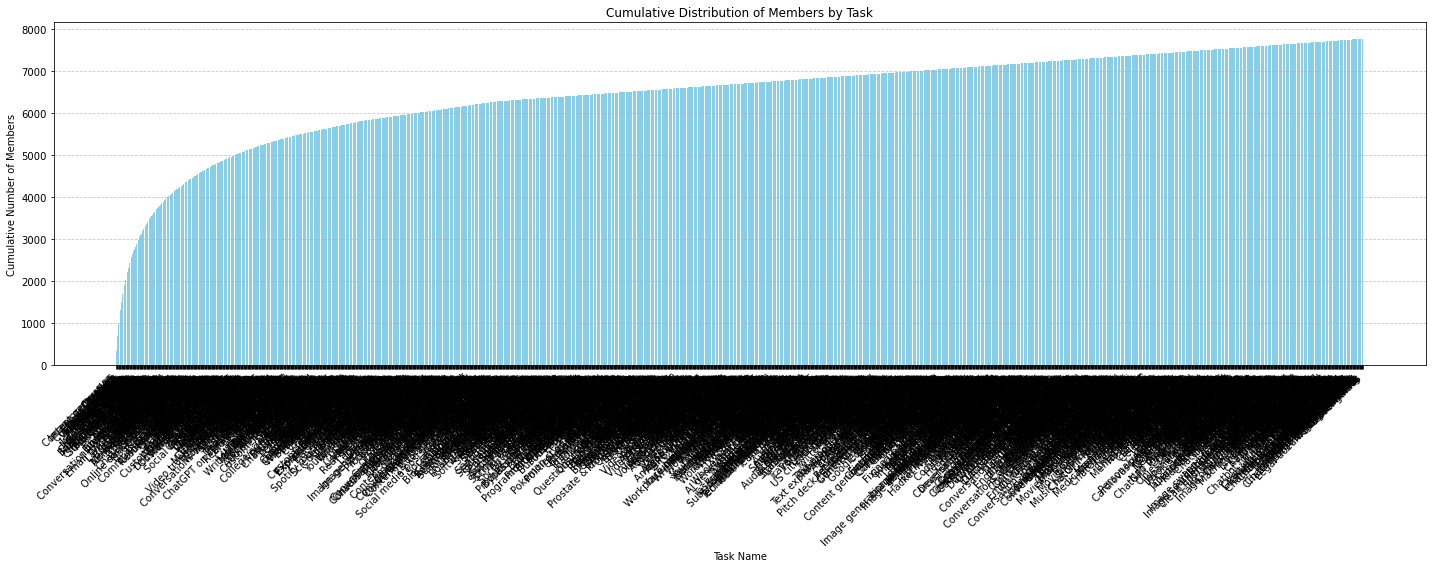

In [ ]:
##### GPT4AA ######
# GPT4AA wrote all of this, no intervention required from me

import matplotlib.pyplot as plt

# Ok, too many to use straight off the bat, let's see the top 20...
task_names['Cumulative Members'] = task_names['Number of Members'].cumsum()

# Plot the cumulative distribution chart
plt.figure(figsize=(20, 8))
plt.bar(task_names['Task Name'], task_names['Cumulative Members'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Task Name')
plt.ylabel('Cumulative Number of Members')
plt.title('Cumulative Distribution of Members by Task')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Ouch, far too many Task Names to use to group the applications.  We'll have to take a different approach. 
We will embed the description of each record (Task Name, USe Case, Tags) and cluster those embeddings.

In [ ]:
# get an embedding model

# pip install sentence_transformers
from sentence_transformers import SentenceTransformer
#from langchain.embeddings import HuggingFaceEmbeddings, SentenceTransformerEmbeddings
import torch

# we need to be on gpu for this to work effectively...
print("is cuda enabled? ", torch.cuda.is_available())

# embedder = HuggingFaceEmbeddings(model_name="BAAI/bge-small-en-v1.5", model_kwargs = {'device': 'cuda'})
# get model
embedder = SentenceTransformer("BAAI/bge-small-en-v1.5")

is cuda enabled?  True


In [9]:
def get_embedding(row):
    
    # get text to embed
    text = row['Task Name'] + '. ' + row['Use Case'] # + ': '+ row['Tags']

    # embed the model description 
    embedding = embedder.encode(text)

    return embedding

df_extracted['embedding'] = df_extracted.apply(get_embedding, axis=1)

df_extracted.head()

,Task Name,Name,Link,Use Case,Tags,Saves,Pricing,embedding
0,A/B testing,Indiezebra,https://indiezebra.com/,Product launch optimization.,"A/B testing, test, ProductHunt, launch, waitlist",32,No pricing,"[-0.09317656, 0.057735357, 0.019310746, -0.038..."
1,ADHD chatbot,Comigo,https://www.comigo.ai/,ADHD cognitive support for personal task manag...,"ADHD, chatbot, Q&A, conversation",42,No pricing,"[-0.043708794, 0.010003206, 0.037571985, -0.03..."
2,AI app integration,Buildship,https://buildship.com/,Simplified backend workflow development with v...,"apps, integration, development, workflow, Free...",4,Free + from $25/mo,"[-0.05078253, -0.006875723, 0.013212709, -0.05..."
3,AI app integration,Glide Apps,https://www.glideapps.com/ai,Custom app development and integration.,"apps, integration, development, Free + from $2...",14,Free + from $25/mo,"[-0.04581791, -0.04224787, 0.035650805, -0.065..."
4,AI app integration,Intellapi,https://intellapi.com/,Developer capabilities integration.,"apps, integration, development, Free + from $1...",20,Free + from $1.99/month,"[-0.03610371, -0.040018044, 0.031286836, -0.07..."


In [10]:
# Ensure the 'Saves' column is numeric and set nan to 0
df_extracted['Saves'] = pd.to_numeric(df_extracted['Saves'], errors='coerce')
df_extracted['Saves'].fillna(0, inplace=True)


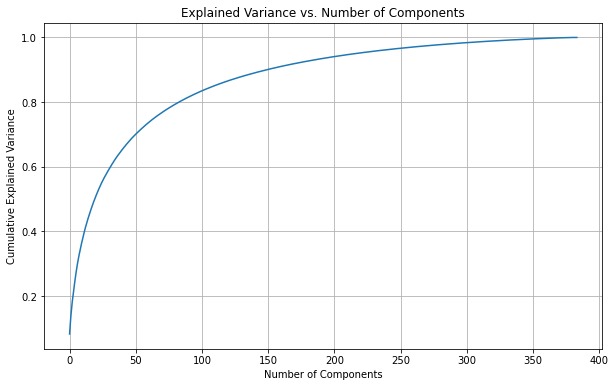

In [11]:
# Are the 384 dimensions largely wasted, meaing, are most not being used due this being all AI services...
# PCA 'variance retained analysis, to tell us how many dimensions are required to retain a % of information...

##### GPT4AA ######
# GPT4AA wrote all of this, no intervention required from me

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Load data
# data = ...  # Your embedding data here

# Perform PCA
pca = PCA()
pca.fit(df_extracted['embedding'].tolist())

# Calculate cumulative explained variance
explained_variance  = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot
plt.figure(figsize=(10,6))
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

This is rather awkward data to work with, we'd like to apply the 80/20 rule and retain 80% of the variance, but that leads to 80+ dimensions, which will be time consuming to cluster in.

The alternative approach is to take the knee of the diagram, where the returns for retaining additional dimensions begin to diminish. That looks to be around 50dims. We can then compare clustering results at 50dims with those at 30 or 40 and see if reducing the number of dims further has a substantial impacts on the patterns in the number of clusters found.

UMAP can be used to reduce the data to 50 /40 / 30 dims whilst retaining cluster structure.

In [12]:
# We'll UMAP down to 30 dims first, the easiest to apply HDBSCAN, then LDA to 2dims for visualising...

import umap
import hdbscan

# Currently all the rows with similar task names are listed together, the whole data set is also in alphabetical order
# Let's shuffle the data
# df_extracted = df_extracted.sample(frac=1)
# Shuffling cancelled! Messed up repeatability of this notebook

# extract the embeddings column for convenience
embeddings = list(df_extracted['embedding'])


In [13]:
from concurrent.futures import ProcessPoolExecutor
from itertools import product
import time

##### GPT4AA ######
# GPT4AA wrote the majority of this, some intervention required from me

# Function to process a set of parameters
def process_parameters(params):
    metric, n_neighbors, min_dist, n_components, min_samples, min_cluster_size = params
    
    # Reduce dimensions with UMAP
    reducer = umap.UMAP(n_neighbors=n_neighbors, n_components=n_components, min_dist=min_dist, metric=metric)
    embeddings_reduced = reducer.fit_transform(embeddings)
    
    # Cluster with HDBSCAN
    clusterer = hdbscan.HDBSCAN(min_samples=min_samples, min_cluster_size=min_cluster_size, metric=metric)
    cluster_labels = clusterer.fit_predict(embeddings_reduced)
    
    # Calculate metrics
    n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)  # Exclude noise cluster
    proportion_clustered = np.sum(cluster_labels != -1) / len(cluster_labels)
    
    # Calculate median number of points per cluster (excluding noise cluster)
    cluster_sizes = [np.sum(cluster_labels == i) for i in set(cluster_labels) if i != -1]
    median_cluster_size = np.median(cluster_sizes) if cluster_sizes else 0

    return ({
        'metric':                  metric,
        'UMAP_n_neighbors':        n_neighbors,
        'UMAP_min_dist':           min_dist,
        'UMAP_n_components':       n_components,
        'HDBSCAN_min_samples':     min_samples,
        'HDBSCAN_min_cluster_size':min_cluster_size,
        'Number_of_clusters':      n_clusters,
        'Proportion_clustered':    proportion_clustered,
        'Median_cluster_size':     median_cluster_size
        },
        cluster_labels
        )


In [14]:
from joblib import Parallel, delayed
from tqdm import tqdm

##### GPT4AA ######
# GPT4AA wrote some of this, esp params as product of combinations and the parallel processing, both of which were a long time since I last coded these.

# if we have not already searched the param space...
if os.path.exists('df_results.parquet'):
    # Load the file
    df_results = pd.read_parquet('df_results.parquet')
else:
    # Must search for the results
    # Pre-calculate combinations of parameters
    param_combinations = list(product(
        ['euclidean', 'manhattan'], # metric
        [5, 10, 15],       # UMAP n_neighbors
        [0.0, 0.5],        # UMAP min_dist
        [30, 40, 50],      # UMAP n_components
        [5, 10, 15],       # HDBSCAN min_samples
        [10, 50, 100]      # HDBSCAN min_cluster_size
    ))

    # Function to process a set of parameters remains the same
    results = []

    # We'll flag points marked as belonging to cluster -1 (noise).
    # We'll do this cumulatively, meaning a point repeatedly marked as noise will accumulate a large -ve value
    # This will allow us to identify the points which are repeatedly hard to cluster, the real outliers.
    outliers = np.zeros((len(embeddings),))

    # if using parallel processing....
    #for result in tqdm(Parallel(n_jobs=7)(delayed(process_parameters)(params) for params in param_combinations), total=len(param_combinations)):
    #    results.append(result)

    # if using sequential processing
    for params in tqdm(param_combinations, total=len(param_combinations)):
        result   = process_parameters(params)
        outliers = outliers + np.array([-1 if cluster==-1 else 0 for cluster in result[1]])
        results.append(result[0])       

    # Convert results to a DataFrame for easier analysis
    df_results = pd.DataFrame(results)

    # save to file, this data took a long time to create, shame to rebuild it later!
    df_results.to_parquet('df_results.parquet', index=True)

    # Add outlier informtion to df_extracted
    df_extracted['Outliers'] = outliers.tolist()

    # save df_extracted
    df_extracted.to_parquet('df_extracted.parquet', index=True)


# let's see the results..
df_results.sample(n=20)

,metric,UMAP_n_neighbors,UMAP_min_dist,UMAP_n_components,HDBSCAN_min_samples,HDBSCAN_min_cluster_size,Number_of_clusters,Proportion_clustered,Median_cluster_size
6,euclidean,5,0.0,25,15,10,129,0.869392,34.0
296,manhattan,15,0.0,75,15,100,25,0.818871,190.0
198,manhattan,5,0.5,50,5,10,148,0.757552,26.0
114,euclidean,15,0.0,25,15,10,120,0.839825,40.0
112,euclidean,15,0.0,25,10,50,45,0.832498,112.0
276,manhattan,15,0.0,25,15,10,111,0.823114,39.0
312,manhattan,15,0.5,50,15,10,79,0.667309,38.0
40,euclidean,5,0.5,50,10,50,37,0.687621,97.0
156,euclidean,15,0.5,75,10,10,100,0.702018,34.5
232,manhattan,10,0.0,50,15,50,43,0.829027,126.0


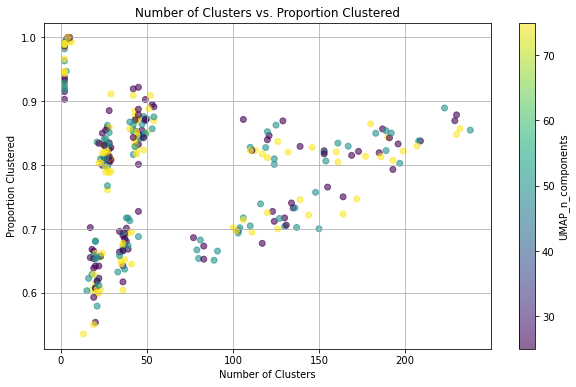

In [15]:
##### GPT4AA ######
# GPT4AA wrote all of this, no intervention required from me

# Plotting Number_of_clusters against Proportion_clustered, colored by UMAP_n_components
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_results['Number_of_clusters'], 
                      df_results['Proportion_clustered'], 
                      c=df_results['UMAP_n_components'], 
                      alpha=0.6, 
                      cmap='viridis')
plt.title('Number of Clusters vs. Proportion Clustered')
plt.xlabel('Number of Clusters')
plt.ylabel('Proportion Clustered')
plt.colorbar(scatter, label='UMAP_n_components')
plt.grid(True)
plt.show()


The above chart is good news. The patterns in the clusters found is the same whether the clustering exercise is conducted in 30, 40 or 50 dimensions.

We can now focus on the clustering params which cluster the highest proportion of the data, without
- a) resorting to the cheat strategy of clustering everything into 1 block
- b) resorting to another cheat strategy of having huge numbers of small clusters, one for every eventuality.

That sweet spot appears to be around 88% of the data with approx 20 clusters. The number of dimensions does not appear to be a factor.

In [16]:
# We need a combination of params which cluster a high proportion of the data whilst also creating a useful number of clusters
# This code is mine, you can tell because it follows the DPLYR style I learnt to appreciate in R
# Its also the only hand crafted set of values in the this notebook, it would have been feasible to cluster the clusters (see above chart).
# Then automatically select the optimal combination of params. But honestly, this was simpler. Would have been nice to show the above chart to GPT4Vision and get its opinion.

# Let's look at the params which cluster > 85% of the data and give less than 50 clusters but more than 10
filtered_results_euc = df_results[(df_results['Number_of_clusters'] > 10) \
                                        & (df_results['Number_of_clusters'] < 30) \
                                            & (df_results['Proportion_clustered'] > 0.85)\
                                                & (df_results['metric']=='euclidean')]\
                                                    .sort_values('Proportion_clustered', ascending=False)\
                                                        .head(n=20)

filtered_results_man = df_results[(df_results['Number_of_clusters'] > 10) \
                                        & (df_results['Number_of_clusters'] < 30) \
                                            & (df_results['Proportion_clustered'] > 0.85) \
                                                & (df_results['metric']=='manhattan')]\
                                                    .sort_values('Proportion_clustered', ascending=False)\
                                                        .head(n=20)
display(filtered_results_euc)
display(filtered_results_man)

,metric,UMAP_n_neighbors,UMAP_min_dist,UMAP_n_components,HDBSCAN_min_samples,HDBSCAN_min_cluster_size,Number_of_clusters,Proportion_clustered,Median_cluster_size
14,euclidean,5,0.0,50,10,100,27,0.862322,206.0
74,euclidean,10,0.0,75,5,100,28,0.859365,202.0
5,euclidean,5,0.0,25,10,100,27,0.858722,194.0


,metric,UMAP_n_neighbors,UMAP_min_dist,UMAP_n_components,HDBSCAN_min_samples,HDBSCAN_min_cluster_size,Number_of_clusters,Proportion_clustered,Median_cluster_size
182,manhattan,5,0.0,75,5,100,29,0.911557,197.0
167,manhattan,5,0.0,25,10,100,28,0.885461,203.0
164,manhattan,5,0.0,25,5,100,26,0.854994,202.0
227,manhattan,10,0.0,50,5,100,28,0.851138,195.5
221,manhattan,10,0.0,25,10,100,24,0.850109,196.5


In [17]:
# We'll opt for the params giving around 20 clusters, easy to discuss, and nearly 90% of points clustered
# We'll inspect how the clusters appear using the differing metrics

# euclidean distances
params_euc = filtered_results_euc.iloc[0]

# manhattan distances
params_man = filtered_results_man.iloc[0]

Having scanned the hyperparams for the optimum arrangements, we now need to get the clusterer objects for those selected arrangments.
There is some randomness in both UMAP and HDBSCAN, we'll need to loop over these optimum hyperparams a few times to land upon the number of clusters we expect. 

In [19]:
import pickle
import ast

##### GPT4AA ######
# GPT4AA wrote most of this, its fairly straight foward.
# I am however glad that I've coded this kind of analysis before, I had to intervene with some tweaks.

# get clustering details using selected params
def get_clusters(params, metric):

    print("Starting process for Metric = ", metric)

    # HDBSCAN
    Number_of_clusters = params.Number_of_clusters+1
    iteration          = 0

    # UMAP and HDBSCAN are a little random, need to cycle round the process until we get the expected number of clusters
    while Number_of_clusters > params.Number_of_clusters:
        
        # UMAP
        reducer            = umap.UMAP(n_neighbors=params.UMAP_n_neighbors, min_dist=params.UMAP_min_dist, n_components=params.UMAP_n_components, metric=metric)
        embeddings_reduced = reducer.fit_transform(embeddings) 

        # HDBSCAN
        clusterer          = hdbscan.HDBSCAN(min_samples=params.HDBSCAN_min_samples, min_cluster_size=params.HDBSCAN_min_cluster_size, metric=metric) 
        cluster_labels     = clusterer.fit_predict(embeddings_reduced)
        Number_of_clusters = len(set(cluster_labels))
        print("Metric=", metric,". Iteration=", iteration ,". No. of Clusters=", len(set(cluster_labels)) )
        iteration += 1

    # return the hdbscan clusterer object for tree analysis later
    return clusterer, embeddings_reduced

# function to save progress as pickle files
def save_object_to_file(object_to_save, filename):
    with open(filename, 'wb') as f:
        pickle.dump(object_to_save, f)

# function to save progress to pandas dataframe of all details
def cluster_details_to_pandas(metric, clusterer, embeddings_reduced):
    df_extracted['Cluster_HDBSCAN_'+metric[:3]]   = clusterer.labels_
    df_extracted['embedding_reduced_'+metric[:3]] = embeddings_reduced.tolist()
    # save to parquet, enables correct saving of numpy in columns, else numpy arrays are saved as space delimited strings (yuck)
    df_extracted.to_parquet('df_extracted.parquet', index=True)

In [20]:
# We now need to create the hdbscan clusterer object for these optimal params
# This takes time, so if we saved them already, just load the details.

##### NOT GPT4AA ######
# GPT4AA wrote none of this, I asked it to refactor the code, but it made it even longer and less readable.


#==================================================
# calculate from afresh
clusterer_euc, embeddings_reduced_euc = get_clusters(params=params_euc, metric='euclidean')
# save progress
save_object_to_file(clusterer_euc, "clusterer_euc.pkl")
save_object_to_file(embeddings_reduced_euc, "embeddings_reduced_euc.pkl")


Starting process for Metric =  euclidean


Metric= euclidean . Iteration= 0 . No. of Clusters= 32
Metric= euclidean . Iteration= 1 . No. of Clusters= 26


In [21]:

#==================================================
# load manhattan clusterer and get embeddings

# calculate from afresh
clusterer_man, embeddings_reduced_man = get_clusters(params=params_man, metric='manhattan')
# save progress
save_object_to_file(clusterer_man, "clusterer_man.pkl")
save_object_to_file(embeddings_reduced_man, "embeddings_reduced_man.pkl")


Starting process for Metric =  manhattan
Metric= manhattan . Iteration= 0 . No. of Clusters= 30
Metric= manhattan . Iteration= 1 . No. of Clusters= 30
Metric= manhattan . Iteration= 2 . No. of Clusters= 23


In [22]:

#==================================================
# copy these details into the df_extracted

cluster_details_to_pandas('euclidean', clusterer_euc, embeddings_reduced_euc)
cluster_details_to_pandas('manhattan', clusterer_man, embeddings_reduced_man)


# Save df_extracted
df_extracted.to_parquet('df_extracted.parquet', index=True)


In [23]:
# Good to have a list of colors as long as the list of clusters...

##### GPT4AA ######
# GPT4AA wrote all of this, no intervention required from me

import colorsys

def generate_rgba_colors(n, alpha=0.5):
    """
    Generate a list of n evenly separated colors in the RGB space with the specified alpha.
    
    Parameters:
    - n: Number of colors to generate.
    - alpha: Alpha value for transparency.
    
    Returns:
    - List of RGBA colors.
    """
    colors = []
    for i in range(n):
        # Vary the Hue component and keep Saturation and Value constant
        hue        = i / n
        saturation = 1
        value      = 1
        r, g, b    = colorsys.hsv_to_rgb(hue, saturation, value)
        colors.append(f"rgba({int(r * 255)}, {int(g * 255)}, {int(b * 255)}, {alpha})")

    # cluster -1, noise, should be grey
    colors[0] = 'rgba(200,200,200,0.5)'

    return colors

# Test the function
custom_colors = generate_rgba_colors(n=df_extracted['Cluster_HDBSCAN_man'].nunique())

custom_colors


['rgba(200,200,200,0.5)',
 'rgba(255, 66, 0, 0.5)',
 'rgba(255, 133, 0, 0.5)',
 'rgba(255, 199, 0, 0.5)',
 'rgba(243, 255, 0, 0.5)',
 'rgba(177, 255, 0, 0.5)',
 'rgba(110, 255, 0, 0.5)',
 'rgba(44, 255, 0, 0.5)',
 'rgba(0, 255, 22, 0.5)',
 'rgba(0, 255, 88, 0.5)',
 'rgba(0, 255, 155, 0.5)',
 'rgba(0, 255, 221, 0.5)',
 'rgba(0, 221, 255, 0.5)',
 'rgba(0, 155, 255, 0.5)',
 'rgba(0, 88, 255, 0.5)',
 'rgba(0, 22, 255, 0.5)',
 'rgba(44, 0, 255, 0.5)',
 'rgba(110, 0, 255, 0.5)',
 'rgba(177, 0, 255, 0.5)',
 'rgba(243, 0, 255, 0.5)',
 'rgba(255, 0, 199, 0.5)',
 'rgba(255, 0, 133, 0.5)',
 'rgba(255, 0, 66, 0.5)']

In [24]:
# function to plot the clusters
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

##### GPT4AA ######
# GPT4AA wrote some of this, I had to intervene with LDA choice and in the end, would have been easier to write it myself.

def get_plot(metric, compression):

    cluster_column     = 'Cluster_HDBSCAN_'+metric[:3]
    embedding_column   = 'embedding_reduced_'+metric[:3]
    custom_colors      = generate_rgba_colors(n=df_extracted[cluster_column].nunique())

    embeddings         = df_extracted[embedding_column].tolist()
    clusters           = df_extracted[cluster_column].tolist()

    if compression == 'UMAP':
        embeddings_2d = umap.UMAP(n_neighbors=15, n_components=2, metric=metric).fit_transform(embeddings)

    elif compression == 'LDA':
        embeddings_2d = LDA(n_components=2).fit_transform(np.array(embeddings), np.array(clusters))

    else:
        raise Exception("Compression type not known")
    
    df_plot            = pd.DataFrame(embeddings_2d, columns=["UMAP1", "UMAP2"])
    df_plot["Cluster"] = clusters
    # convert labels to string so they become categorical in plotly
    #df_plot["Cluster"] = df_plot["Cluster"].astype(str)
    scatter            = px.scatter(df_plot, x="UMAP1", y="UMAP2", color="Cluster", color_discrete_sequence=custom_colors).data[0]

    return scatter


In [25]:
# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Euclidean", "Manhattan"))

# Cos Euc: Add scatter plot for first dataset
fig.add_trace(get_plot(metric = 'euclidean', compression='LDA'), row = 1, col = 1)
fig.add_trace(get_plot(metric = 'manhattan', compression='LDA'), row = 1, col = 2)

# Show the combined figure
fig.show()


In [26]:
# Now let's see the cluster trees

##### GPT4AA ######
# GPT4AA wrote all of this, no intervention required from me.

import matplotlib.pyplot as plt
from io import BytesIO

def capture_plot(clusterer, condensed_tree=True, select_clusters=False):
    """Capture the plot generated by the clusterer as an image."""
    buf = BytesIO()
    if condensed_tree:
        # condensed tree
        clusterer.condensed_tree_.plot(select_clusters=select_clusters, label_clusters=True, log_size=True)
    else:
        # single linkage tree
        clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)
        
    plt.savefig(buf, format='png')
    plt.close()
    buf.seek(0)
    return plt.imread(buf)


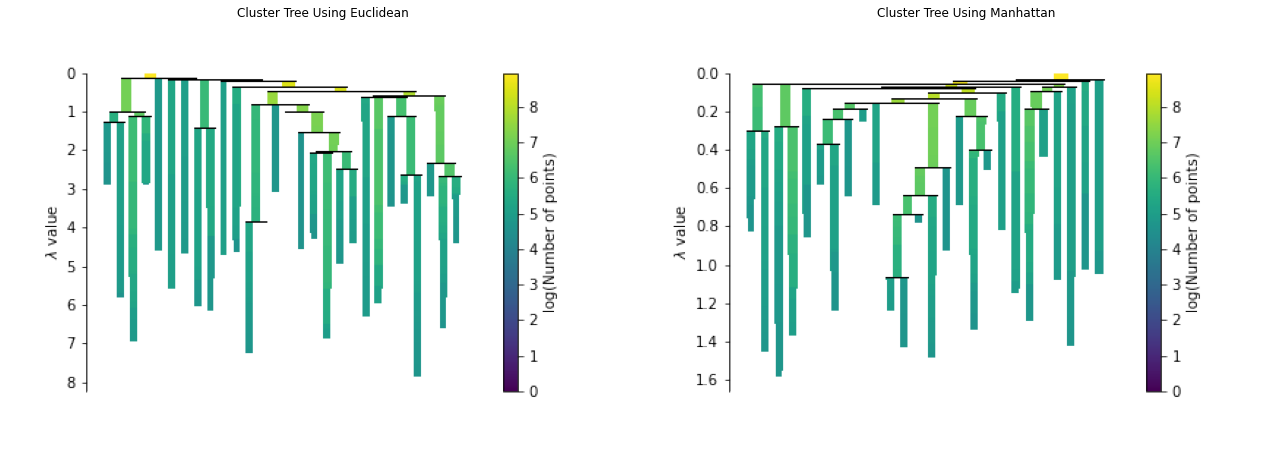

In [27]:
##### GPT4AA ######
# GPT4AA wrote all of this, no intervention required from me

# Capture the plots as images
img1 = capture_plot(clusterer_euc)
img2 = capture_plot(clusterer_man)

# Display the images side by side using matplotlib
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

ax1.imshow(img1)
ax1.axis('off')
ax1.set_title('Cluster Tree Using Euclidean')

ax2.imshow(img2)
ax2.axis('off')
ax2.set_title('Cluster Tree Using Manhattan')

plt.tight_layout()
plt.show()


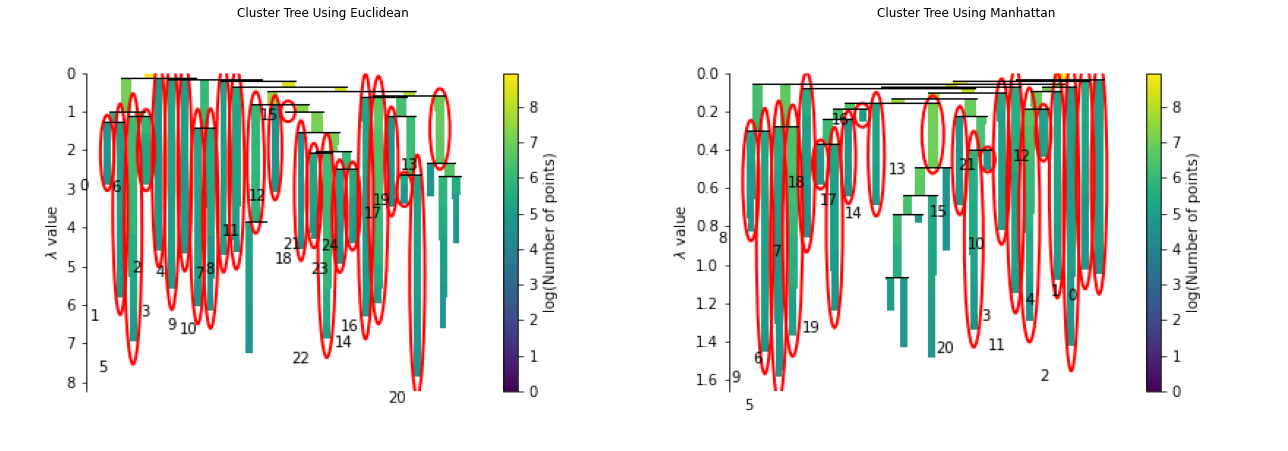

In [28]:
# Capture the plots as images
img3 = capture_plot(clusterer_euc, select_clusters=True)
img4 = capture_plot(clusterer_man, select_clusters=True)

# Display the images side by side using matplotlib
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

ax1.imshow(img3)
ax1.axis('off')
ax1.set_title('Cluster Tree Using Euclidean')

ax2.imshow(img4)
ax2.axis('off')
ax2.set_title('Cluster Tree Using Manhattan')

plt.tight_layout()
plt.show()

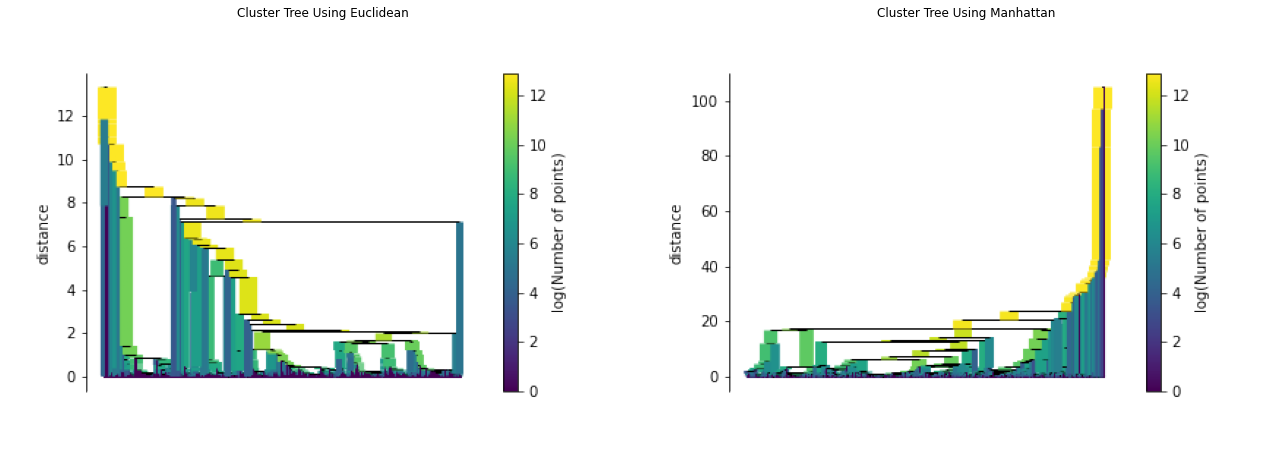

In [29]:
# Capture the plots as images
img5 = capture_plot(clusterer_euc, condensed_tree=False)
img6 = capture_plot(clusterer_man, condensed_tree=False)

# Display the images side by side using matplotlib
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

ax1.imshow(img5)
ax1.axis('off')
ax1.set_title('Cluster Tree Using Euclidean')

ax2.imshow(img6)
ax2.axis('off')
ax2.set_title('Cluster Tree Using Manhattan')

plt.tight_layout()
plt.show()

Let's see if we can turn that dendrogram into a mindmap...we'll focus on manhattan for now, both are very similar..

In [30]:

# Focus on just one distance metric for now...
clusterer      = clusterer_man
cluster_label  = 'Cluster_HDBSCAN_man'
embedding_label= 'embedding_reduced_man'

# Get the tree in pandas format
tree = clusterer.condensed_tree_.to_pandas()
cluster_tree = tree[tree.child_size > 1]

tree

,parent,child,lambda_val,child_size
0,7779,1687,0.009539,1
1,7779,6142,0.009539,1
2,7779,6629,0.009539,1
3,7779,6143,0.009539,1
4,7779,6141,0.009539,1
...,...,...,...,...
7824,7828,1316,1.240397,1
7825,7828,1248,1.240397,1
7826,7828,1289,1.240397,1
7827,7828,1222,1.240397,1


The above HDBSCAN condensed tree contains both leaf nodes (which represent individual data points) and internal nodes (which represent clusters). The indices corresponding to data points should match the indices of df_extracted, but the tree will also have additional indices representing these internal nodes (clusters).

In [31]:
##### GPT4AA ######
# Initially GPT4AA wrote this, but it was so convoluted that I didn't understand what it was doing
# So I had to write this from scratch, although it gave some clues. 
# This is what happens when you ask GPT4AA to write about something you have not done previously.
# You are skeptical so end up rewriting it in order to understand it.

parents_set  = set(tree['parent'])
children_set = set(tree['child'])
allnodes_set = parents_set.union(children_set)

# In the tree a parent can also be a child, so we cannot assume a child is a leaf(i.e. a point) 

# 1. Leaf Nodes: Leaves, i.e. points, a child who is not a parent of any type
leaf_nodes   = children_set.difference(parents_set)

# 2. Internal Nodes: Any node which is not a leaf
internal_nodes= allnodes_set.difference(leaf_nodes)

print("Leaf Nodes: Length=", len(leaf_nodes))
print(leaf_nodes)
print("\n")
print("Internal Nodes: Length=", len(internal_nodes))
print(internal_nodes)
print("\n")
print("Cross check, two values should be same...")
print("All nodes summed=",len(leaf_nodes)+len(internal_nodes))
print("All nodes unique=",len(allnodes_set))

Leaf Nodes: Length= 7779
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,

In [32]:
##### GPT4AA ######
# GPT4AA wrote all of this, I unit tested it assiduosly

# Let's get just the rows where both parent and child are internal nodes, not leaves.

# Filter the tree to only include relationships between these internal nodes
internal_relationships = tree[
    tree['parent'].isin(internal_nodes) & 
    tree['child'].isin(internal_nodes)
]

internal_relationships.sort_values('parent', ascending=False)

,parent,child,lambda_val,child_size
7439,7826,7829,1.063933,113
7438,7826,7828,1.063933,165
6254,7824,7827,0.735601,108
6253,7824,7826,0.735601,454
6046,7822,7825,0.639444,240
6045,7822,7824,0.639444,572
4056,7816,7819,0.371680,200
4055,7816,7818,0.371680,187
2744,7814,7816,0.238384,451
2745,7814,7817,0.238384,114


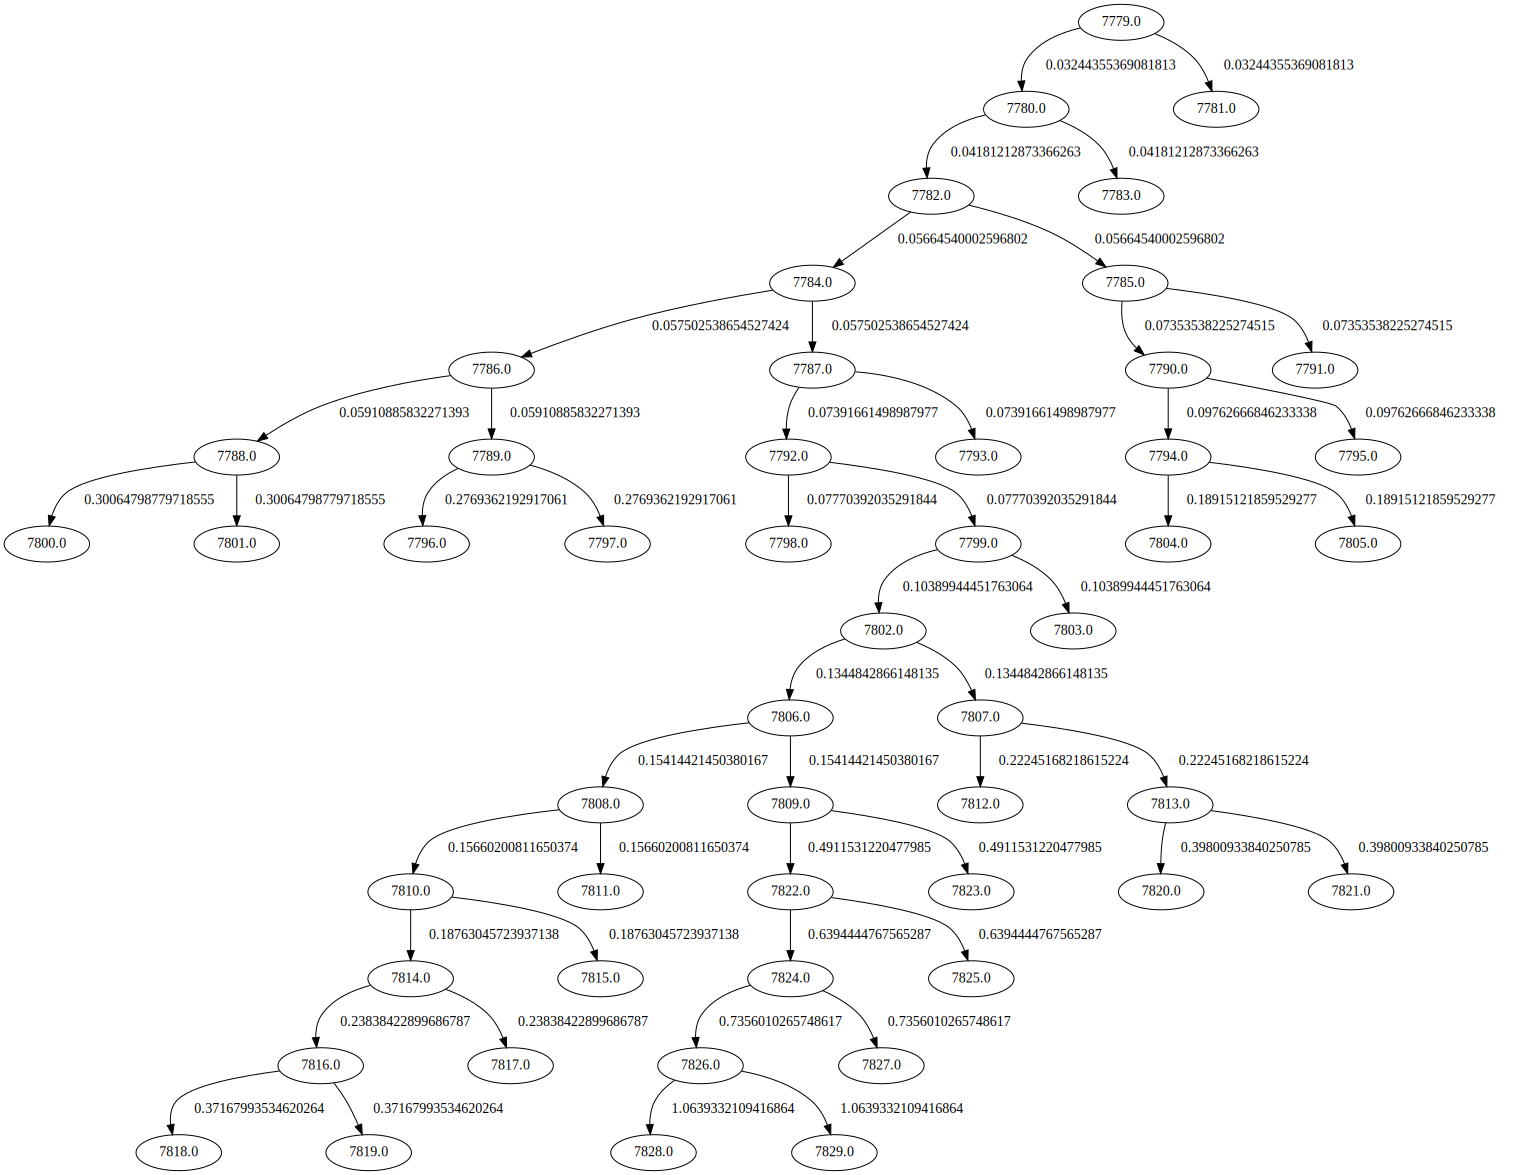

In [33]:

# We are hoping the tree is simple enough to use it for building a mindmap or hierarchical strcuture of clusters
# Although hopes ar elow, looks quite complex.

##### GPT4AA ######
# GPT4AA wrote all of this, really helped me out, I have no previous experience with the Digraph object model
# BUT, it took a fair while of chatting to get to this approach of viewing the tree

import io
from graphviz import Digraph

# Create a Directed Graph
dot = Digraph()

# Add nodes and edges
for _, row in internal_relationships.iterrows():
    dot.node(str(row['parent']), str(row['parent']))
    dot.node(str(row['child']),  str(row['child']))
    dot.edge(str(row['parent']), str(row['child']), label=str(row['lambda_val']))

dot


In [34]:
# That is clearly way too complex
# HDBSCAN simplifies it by grouping the clusters
# We can easily see what those are...

# I coded this, again you can tell because I am comfortable with pandas, also resultes in easily visible results for the sake of unit testing
# whereas GPT4AA loves to wrangle data with base types like set, dict and list.

from collections import defaultdict

# We'd like to see how internal parent nodes map to clusters. Two steps:
# 1. map the child (i.e. data row) to the parent node, using the tree
# 2. map the parent node to the cluster

# first let's add the parent nodes to the dataframe...
# The children which are leaves are simply the indexes of the matching data in df_extracted, so...
child_to_parent = tree[tree['child_size'] == 1].sort_values('child')['parent'].tolist()
df_extracted['parent_node_'] = child_to_parent

# Now, we're interested in showing where the clusters lie in the tree, clusters are collated nodes.
# create a table mapping the parent nodes to the clusters. 
parent_to_cluster = df_extracted.groupby('parent_node_')[cluster_label].unique().reset_index()
parent_to_cluster[cluster_label] = parent_to_cluster[cluster_label].apply(lambda x: ", ".join(map(str, x)))

parent_to_cluster


,parent_node_,Cluster_HDBSCAN_man
0,7779,-1
1,7780,-1
2,7781,0
3,7782,-1
4,7783,1
5,7785,-1
6,7787,-1
7,7788,-1
8,7789,-1
9,7791,2


In [35]:
# Merging the dataframes
merged_df = internal_relationships.merge(parent_to_cluster, left_on='child', right_on='parent_node_', how='left')

# We'll create a new column and use the cluster name EXCEPT if cluster = -1 (noise), then we leave as the parent node
merged_df['Cluster_node'] = merged_df.apply(lambda row: row['parent'] if row[cluster_label] == str(-1) or row[cluster_label] is np.nan else int(row[cluster_label]), axis=1)
merged_df.drop(columns=['parent_node_'], inplace=True)  # Dropping the 'parent_node_' column for clarity

#merged_df = merged_df[['Cluster_node','child_size']].groupby(['Cluster_node']).sum()
merged_df.sort_values('Cluster_node')

,parent,child,lambda_val,child_size,Cluster_HDBSCAN_man,Cluster_node
1,7779,7781,0.032444,154,0,0
3,7780,7783,0.041812,285,1,1
11,7785,7791,0.073535,168,2,2
13,7787,7793,0.073917,257,3,3
15,7790,7795,0.097627,183,4,4
16,7789,7796,0.276936,248,5,5
17,7789,7797,0.276936,599,6,6
18,7792,7798,0.077704,256,7,7
20,7788,7800,0.300648,193,8,8
21,7788,7801,0.300648,231,9,9


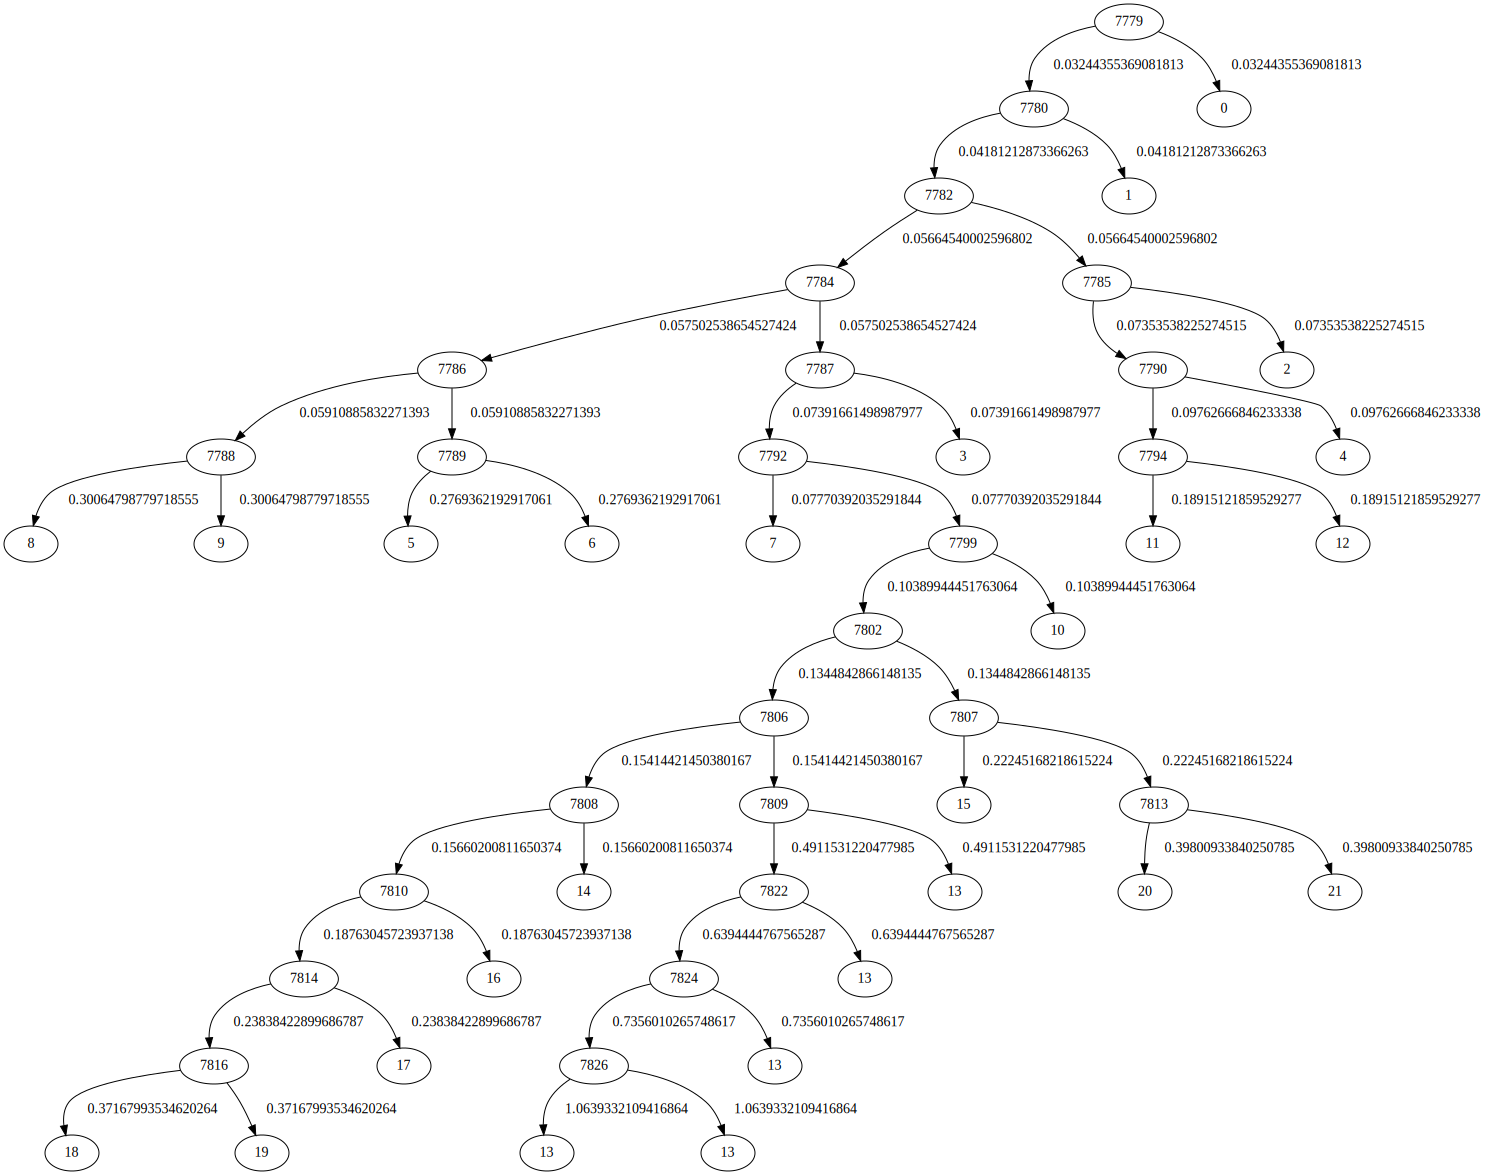

In [36]:
# We can now replace the nodes with cluster names...
# Repeat GPT4AAs code from earlier

# Create a Directed Graph
dot = Digraph()

# Add nodes and edges
for _, row in merged_df.iterrows():
    dot.node(str(row['parent']), str(row['parent']))
    dot.node(str(row['child']), str(row['Cluster_node']))
    dot.edge(str(row['parent']), str(row['child']), label=str(row['lambda_val']))

dot

In [37]:
# Those digraphs are too big to view on screen.
# Quick bit of google reveals the Sankey diagram might suit this type of data

##### GPT4AA ######
# Having decided upon the charting package, I asked GPT4AA to write all of this, no intervention required from me


import plotly.graph_objects as go

# Create nodes and links for the Sankey diagram
all_nodes = list(set(internal_relationships['parent']).union(set(internal_relationships['child'])))
node_indices = {node: idx for idx, node in enumerate(all_nodes)}

# Create the links using the node indices
links = {
    'source': internal_relationships['parent'].map(node_indices).tolist(),
    'target': internal_relationships['child'].map(node_indices).tolist(),
    'value':  internal_relationships['child_size'].tolist()
}

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = all_nodes
    ),
    link = links
)])

fig.update_layout(title_text="Sankey Diagram of Internal Nodes Relationships", font_size=10)
fig.show()

The above charts a great, but having a number for the node name doesn't tell us much. 
We'd like to characterise each node, as if it were a node in a mindmap.
First step is to get the centroid of each parent node, this is a little involved as we need to read down the tree for each parent, into each child (aka leaf) node, to get the complete lis of embeddings belonging to the parent.
Then we sample the embeddings for each node and get text to represent each node.
We will likley need to sumarise that text via an LLM.


In [38]:
from scipy.spatial.distance import cdist
from collections import defaultdict

##### GPT4AA ######
# GPT4AA wrote all of this, no intervention required from me
# I unit tested, of course, which takes time. Should have asked it to write tests too.

# function to sort embeddings according to distance to a centroid (lowest distance first)
def get_closest_embeddings(embeddings_list, centroid):
    """
    Returns the top 10 closest embeddings to the centroid based on Euclidean distance.

    :param embeddings: List of embedding vectors.
    :param centroid: Centroid vector.
    :return: List of top 10 closest embeddings to the centroid.
    """
    # convert to numpy...
    samples = np.array(samples)
    complete_list = np.array(complete_list)

    # Compute the Euclidean distance between each embedding and the centroid
    distances = np.linalg.norm(embeddings_list - centroid, axis=1)
    
    # Get the indices of the embeddings sorted by their distances, shortest distance first
    sorted_indices = np.argsort(distances).tolist()
    
    # Return embeddings sorted by distance 
    return [embeddings_list[i] for i in sorted_indices]

In [39]:
##### NOT GPT4AA ######
# GPT4AA wrote this, but it was convoluted and difficult to test
# I refactored it and ended up rewriting it entirely, wasted time and would have been better to write it myself.

# Use above functions to get the centroids and sample texts...

# Do we analyse by parent nodes, analyse the entire tree?
#   analyse_by_node = True
# Or do we analyse by cluster. NB, clusters are often nodes joined together, see above merged_df.
#   analyse_by_node = False
analyse_by_node = False

# Do we build our sample from the points closest to the node centroid? 
#   close_to_centroid = True
# Or do we randomly sample from all points in the node, thus getting a broader picture. 
#   close_to_centroid = False
close_to_centroid = False

# Regardles sof the type of analysis, how many sample do we take per cluster/node?
# The limit is the amount of tokens we can submit to the LLM for a reasonable summary
samples_per_node  = 40

# setup collections to receive results...
centroids = {}
samples   = {}

df_extracted['sampled']    = False
df_extracted['sampled_for'] = None

# proceed with the analysis
if analyse_by_node:
    # analyse by internal nodes
    keys      = {parent: None for parent in df_extracted['parent_node_'].unique()}
    is_node   = True
    df_column = 'parent_node_'
else:
    # analyse by clusters
    keys      = {cluster: None for cluster in df_extracted[cluster_label].unique()}
    is_node   = False
    df_column = cluster_label

# for each key (eg cluster) within the list of keys (eg clusters)
for key in keys:
    # get all embeddings valid for the key
    valid_embeddings = df_extracted[df_extracted[df_column] == key][embedding_label]

    # if embeddings have been found for the key, then sample them
    if len(valid_embeddings)>0:

        sample_size = min(samples_per_node, len(valid_embeddings))

        # if we want samples close to the centroid...
        if close_to_centroid:
            
            # find the centroid and record it...
            centroid       = np.mean(valid_embeddings.to_numpy(), axis=0)
            centroids[key] = centroid

            # get distances of all embeddings within the key, to the key's centroid
            distances = pd.Series(data  = np.linalg.norm(valid_embeddings.to_numpy() - centroid, axis=1),
                                  index = valid_embeddings.index)
            # take the nearest to the centroid
            distances = distances.sort_values(ascending=True)[:sample_size]
            
            # flag which embeddings have been sampled and for which key..
            df_extracted.loc[df_extracted.index.isin(distances.index), 'sampled']     = True
            df_extracted.loc[df_extracted.index.isin(distances.index), 'sampled_for'] = key

        else:
        # we want a random sample of the key's embeddings
            sample = valid_embeddings.sample(sample_size)
            
            # flag which embeddings have been sampled and for which key..
            df_extracted.loc[df_extracted.index.isin(sample.index), 'sampled']     = True
            df_extracted.loc[df_extracted.index.isin(sample.index), 'sampled_for'] = key

In [40]:
# Flag the selected rows in df_extracted based on the closest embeddings
sampled_data = df_extracted[ (df_extracted['sampled'] ==True) ]
sampled_data.head(n=5)  # Display rows that have been sampled

,Task Name,Name,Link,Use Case,Tags,Saves,Pricing,embedding,Cluster_HDBSCAN_euc,embedding_reduced_euc,Cluster_HDBSCAN_man,embedding_reduced_man,parent_node_,sampled,sampled_for
3,AI app integration,Glide Apps,https://www.glideapps.com/ai,Custom app development and integration.,"apps, integration, development, Free + from $2...",14.0,Free + from $25/mo,"[-0.04581791, -0.04224787, 0.035650805, -0.065...",19,"[9.965995788574219, 2.4491825103759766, 5.8997...",8,"[9.978033065795898, 5.214973449707031, 4.93469...",7800,True,8
8,AI app integration,Retool,https://retool.com/products/ai,Productivity enhanced through workflow integra...,"apps, integration, development, Free + from $1...",16.0,Free + from $10/mo,"[-0.04684156, 0.001522081, 0.020437766, -0.074...",19,"[9.965775489807129, 2.448263645172119, 5.90085...",8,"[9.978216171264648, 5.214870452880859, 4.93187...",7800,True,8
10,AI app integration,Modelfuse,https://modelfuse.ai/,Enables seamless integration of generative alg...,"apps, integration, development, waitlist",8.0,No pricing,"[-0.032541838, -0.023717185, 0.03801773, -0.05...",19,"[9.966350555419922, 2.4500038623809814, 5.8992...",8,"[9.978007316589355, 5.215054512023926, 4.93322...",7800,True,8
20,AI content detection,Free AI Detector,https://contentatscale.ai/ai-content-detector/...,Verification of content authenticity.,"text, analysis, writing",55.0,No pricing,"[-0.06570762, 0.028487148, -0.026445296, -0.05...",-1,"[10.214797019958496, 4.806634902954102, 5.1067...",1,"[9.833001136779785, 5.3615570068359375, 4.9296...",7783,True,1
31,AI content detection,ContentDetector,https://contentdetector.ai/,Detects ChatGPT- generated content plagiarism.,"text, analysis, writing",16.0,No pricing,"[-0.03709735, 0.037829712, -0.035871677, -0.05...",-1,"[10.221142768859863, 4.8247246742248535, 5.076...",1,"[9.829832077026367, 5.363203525543213, 4.93630...",7783,True,1


In [41]:
# Verification

if analyse_by_node:
    print('samples per parent node')
    print('=======================')
    print(sampled_data.groupby('parent_node').count()[embedding_label])
else:
    print('Samples per cluster')
    print('===================')
    print(sampled_data.groupby(cluster_label).count()[embedding_label])


Samples per cluster
Cluster_HDBSCAN_man
-1     40
 0     40
 1     40
 2     40
 3     40
 4     40
 5     40
 6     40
 7     40
 8     40
 9     40
 10    40
 11    40
 12    40
 13    40
 14    40
 15    40
 16    40
 17    40
 18    40
 19    40
 20    40
 21    40
Name: embedding_reduced_man, dtype: int64


In [42]:
# save progress
df_extracted.to_parquet('df_extracted.parquet')

# Summarising the Clusters

Approx 20 clusters is still too many to display conveniently in a chart, it would be great if we could group/summarise them into a handful and then explode those groupings out into the clsuters above. 
This is the task for a sunburst diagram.

We'll use GPT4 to summarise ang Langchain to manage that process. This is all code I've written before, so we just re-use that.
Annoyingly, Langchain did not exist when GPT4 was trained, so it cannot advise on its own API.


In [2]:
import pandas as pd
import os
import pickle
import numpy as np

with open('clusterer_euc.pkl', 'rb') as f:
    clusterer_euc = pickle.load(f)

df_extracted_exists = 'df_extracted' in locals() or 'df_extracted' in globals()

if not df_extracted_exists:
    # Working directory and environment keys
    os.chdir("/home/oliver/Documents/LangChain/ProductDevelopment/MoreClusters")
    cwd = os.getcwd()
    analyse_by_node = False
    cluster_label   = 'Cluster_HDBSCAN_euc'
    embedding_label = 'embedding_reduced_euc'
    df_extracted    = pd.read_parquet('df_extracted.parquet')
    sampled_data    = df_extracted[ (df_extracted['sampled'] ==True) ]

In [3]:

# We need to summarise the sample for each cluster, a task for an LLM.
# Let's see what we will be sending to the LLM for cluster 1
if analyse_by_node:
    
    subset = sampled_data[sampled_data['parent_node_']==sampled_data['parent_node_'].unique()[0]][['Task Name','Use Case','Tags']]
else:
    subset = sampled_data[sampled_data[cluster_label]==1][['Task Name','Use Case','Tags']]

subset['concat'] = 'Task = '+subset['Task Name']+'. Use Case = '+subset['Use Case']+'. Tags = '+subset['Tags']
subset['concat']


442     Task = Avatars. Use Case = Generated personali...
448     Task = Avatars. Use Case = Creates avatars/pro...
449     Task = Avatars. Use Case = Media edited with p...
452     Task = Avatars. Use Case = Create avatars and ...
454     Task = Avatars. Use Case = Person image genera...
456     Task = Avatars. Use Case = Personalize profile...
458     Task = Avatars. Use Case = Created unique prof...
461     Task = Avatars. Use Case = Unique cartoon char...
463     Task = Avatars. Use Case = Advanced artistic s...
466     Task = Avatars. Use Case = Home service: heads...
469     Task = Avatars. Use Case = Diverse and unique ...
470     Task = Avatars. Use Case = Mobile photo editor...
476     Task = Avatars. Use Case = Selfie transformed ...
478     Task = Avatars. Use Case = Generate lifelike h...
482     Task = Avatars. Use Case = Create unique self-...
489     Task = Avatars. Use Case = Generated portraits...
494     Task = Avatars. Use Case = Personalizing real ...
501     Task =

In [4]:
# Now let's send the samples for each node with leaves to the LLM, then we can get its summary
import openai
from dotenv import load_dotenv, find_dotenv

_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.environ['OPENAI_API_KEY']

In [5]:
def fetch_text(key):
    """
    Fetches text associated with a node from HDBSCAN tree
    
    Parameters:
    - key: node number or cluster number (must be int)
    
    Returns:
    - dict{subset_text = sample text, node=int}, as required by langchain chain.
    """

    if analyse_by_node:
        subset = sampled_data[sampled_data['parent_node_']==key][['Task Name','Use Case','Tags']]
    else:
        subset = sampled_data[sampled_data[cluster_label]==key][['Task Name','Use Case','Tags']]

    subset['concat'] = 'Task = '+subset['Task Name']+'. Use Case = '+subset['Use Case']+' Tags = '+subset['Tags']
    
    subset_text = '\n'.join(subset['concat'].to_list())

    return dict({'subset_text':subset_text, 'key':str(key)})

In [6]:
# System prompt makes a real difference to performance. Submit system prompt with 

role_description_title = """
# MISSION
Group and summarise application descriptions to aid those wishing to quickly understand the data presented. 
Think about the reader, they will not see the the full list of descriptions presented to you, only the title you devise.
Hence, you must compress the information into a very choice set of words.
The reader will view your title on a diagram, so you can stay within the word limit by sacrificicing grammar and focusing on word content. 

# INPUT
- A list of application descriptions, inc Task Name, Use Case. Plus, a key identifier for each row.
- A list of group names which have alreayd been used

# OUTPUT
- An informative but concise title for the list as a whole, summarising the row's content within the word limit.

# RULES

## Word Limit
- Keep to the word limit
## Avoid Reuse
- Be substantially different form any of the existing group names (see list)
## Precision and Economy in Word Choice
- Grouping names must be as informative as possible, within the word limit
- Must Contain details about the type of applications being described
- For example, 'Sports, focus on cycling', 'Entertainment and drama, focus on music', 'Natural world, focus on geology' etc.
## Things to Avoid
- Do not include the key identifier in the grouping name
- Avoid generalities and avoid 'catch all' phrases.
- The reader already knows we are talking about applications, no need to use these words. So, DO NOT use collective words like apps, suite, tools, cluster, software, application, platform, solutions, services
"""

In [7]:
from langchain.prompts import PromptTemplate

template_description_title = """
Reference key: {key}
You have been analysing software applications and are seeking a name for the cluster of applications represented by the below list:

LIST of applications:
'''
{subset_text}
'''

You want to use a name which is substantially DIFFERENT to any names already used for other application groups.
Used Group Names:
'''
{other_names}
'''

# YOUR TASK
a) create a DESCRIPTION
- summarise the above list 
- be descriptive, but less than 50 words
b) create a NAME for the group
- summarise the above DESCRIPTION
- less than 6 words
- Avoid using the names already assigned to other groups.
- DO NOT use collective words like apps, suite, tools, cluster, software, application, platform, solutions, services

"""

prompt_description_title = PromptTemplate(role           = role_description_title,
                                          input_variables= ['subset_text', 'key', 'other_names'], 
                                          template       = template_description_title)

In [8]:
# get the data in the order and format in which it wil be rprsented to LangChain...
if analyse_by_node:
    keys = sampled_data['parent_node_'].unique()
else:
    keys = sampled_data[cluster_label].unique()

# sort and change to base type (currently numpy)
keys = sorted([int(key) for key in keys])
inputs_llm = []

for key in keys:
    inputs_llm.append(fetch_text(key=key))

# sort by the key value (as integer)
inputs_llm = sorted(inputs_llm, key=lambda x: int(x['key']))

# inspect
inputs_llm

[{'subset_text': 'Task = AI content detection. Use Case = Verification of content authenticity. Tags = text, analysis, writing\nTask = AI content detection. Use Case = Detects ChatGPT- generated content plagiarism. Tags = text, analysis, writing\nTask = Agents. Use Case = Delegated tasks performed by autonomous agents. Tags = gpt, agent, task, automation, chatbot, From $7.5/mo\nTask = Agents. Use Case = Managed web-based goal and task system. Tags = autogpt, agent, AGI, Free + from $29/mo\nTask = App icons. Use Case = App icons auto-generated/created for apps. Tags = image, logo, app, $20\nTask = Background noise reduction. Use Case = Noise-free voice recordings and calls with sound tech. Tags = audio, noise, reduction, background, Free + from $10/mo\nTask = Background removing. Use Case = Software that blocks background noise during calls. Tags = background, edit, image, Free + From $8/mo\nTask = Cat breed identification. Use Case = Cat breed identifier & info for enthusiasts Tags = c

In [9]:
from typing   import Optional, Sequence
from pydantic import BaseModel, Field

# First we prepare the type for returning the details of the entity underconsideration.
# This is defines either the sentence pr row being evaluated, so works for both approaches

class ClassificationRow(BaseModel):
    """A row of node number, title, description"""

    key         : int = Field(..., description="Reference key", enum=keys)
    description : str = Field(..., description="Description of the list of software")
    title       : str = Field(..., description="Title devised for the list of software")



In [10]:
from langchain.chains.openai_functions import create_structured_output_chain
from langchain.chat_models import ChatOpenAI
from langchain.callbacks   import get_openai_callback

# If we pass in a model explicitly, we need to make sure it supports the OpenAI function-calling API.
llm  = ChatOpenAI(model_name  = "gpt-4",#gpt-3.5-turbo", 
                  temperature = 0.5, 
                  verbose     = False)

# create a chain, one for each approach
chain_description_title = create_structured_output_chain(ClassificationRow, llm, prompt_description_title, verbose=False)


In [11]:
# To avoid rate limits, we use tenacity for exponential back off
# https://github.com/openai/openai-cookbook/blob/main/examples/How_to_handle_rate_limits.ipynb

from tenacity import (
    retry,
    stop_after_attempt,
    wait_random_exponential,
) 

@retry(wait=wait_random_exponential(min=1, max=60), stop=stop_after_attempt(6))
def run_with_backoff(chain, row):
    return chain.run(row)


In [12]:
# If we were executing just one call, say row [0] to the LLM then this is how we would proceed:

results=[]
with get_openai_callback() as cb:
    
    for row in inputs_llm:
        
        # Get the previous responses, we don;t want to repeat these
        row['other_names'] = '\n'.join( [b.title for b in [a['response'] for a in results]] )

        # query the LLM
        response = run_with_backoff(chain=chain_description_title, row=row)

        # format and save the response
        result   = {'key':row['key'], 'subset_text':row['subset_text'], 'response':response}
        results.append(result)
        
    print(cb)

# For the table approach we would do something like this... 
# result = chain_table.run(toughies_prepped.to_markdown(index=False))
# NB there is only one input table, no need for a list of inputs. Only one call to the LLM.
# We would analyse the results like this:
# evaluation_df = pd.DataFrame([vars(row) for row in result.table])
results

Tokens Used: 36646
	Prompt Tokens: 34962
	Completion Tokens: 1684
Successful Requests: 26
Total Cost (USD): $1.1499


[{'key': '-1',
  'subset_text': 'Task = AI content detection. Use Case = Verification of content authenticity. Tags = text, analysis, writing\nTask = AI content detection. Use Case = Detects ChatGPT- generated content plagiarism. Tags = text, analysis, writing\nTask = Agents. Use Case = Delegated tasks performed by autonomous agents. Tags = gpt, agent, task, automation, chatbot, From $7.5/mo\nTask = Agents. Use Case = Managed web-based goal and task system. Tags = autogpt, agent, AGI, Free + from $29/mo\nTask = App icons. Use Case = App icons auto-generated/created for apps. Tags = image, logo, app, $20\nTask = Background noise reduction. Use Case = Noise-free voice recordings and calls with sound tech. Tags = audio, noise, reduction, background, Free + from $10/mo\nTask = Background removing. Use Case = Software that blocks background noise during calls. Tags = background, edit, image, Free + From $8/mo\nTask = Cat breed identification. Use Case = Cat breed identifier & info for enthu

In [14]:
embedding_label='embedding_reduced_euc'

In [15]:
# confirm the LLM responded with the correct key for each row
responses  = [item['response'] for item in results]

# Are we receiving the same key in responses that we sent in inputs_llm?
keys_equal = [int(item['key']) for item in results] == [int(item['key']) for item in inputs_llm]

print("All keys are correct? ", keys_equal)
print("\n")

if keys_equal:

    key_name = 'parent_node_' if analyse_by_node else cluster_label

    # we can safely get the responses from the LLM
    responses = pd.DataFrame({'key'        : [int(response.key)  for response in responses],
                              'title'      : [response.title for response in responses],
                              'description': [response.description for response in responses]})
    
    # merge with the count of records per key
    children_per_key = pd.DataFrame(df_extracted.groupby(key_name)[embedding_label].count()).reset_index()
    children_per_key.rename(columns={embedding_label: 'record_count'}, inplace=True)
    responses = responses.merge(children_per_key, how='left', left_on='key', right_on=key_name)

    # merge with the sum of Saves per key
    saves_per_key = pd.DataFrame(df_extracted.groupby([key_name])['Saves'].sum()).reset_index()
    responses = responses.merge(saves_per_key, how='left', left_on='key',right_on=key_name)
    responses['saves_per_record'] = round(responses['Saves'] / responses['record_count'])
    responses = responses[['saves_per_record', 'record_count', 'Saves', 'key', 'title', 'description']].sort_values('saves_per_record', ascending=False)

else:
    raise Exception('Key error, LLM using different keys to dataset provided.')

responses

All keys are correct?  True




,saves_per_record,record_count,Saves,key,title,description
10,60.0,196,11714.0,9,Video Production and Enhancement Innovations,A collection of applications focusing on video...
1,51.0,117,6001.0,0,Creative Digital Media Enhancements,A collection facilitating creative processes f...
13,38.0,110,4223.0,12,Digital Wellness and Mental Support,A collection of digital platforms providing me...
3,38.0,122,4677.0,2,Musical Creation and Exploration Innovations,A collection of applications designed to gener...
7,37.0,370,13814.0,6,Visual Enhancement and Styling Innovations,"These applications facilitate image editing, f..."
25,37.0,238,8922.0,24,Information Summarization and Extraction Innov...,Applications for efficient information extract...
24,36.0,190,6767.0,23,AI-Enhanced Knowledge Extraction Innovations,These applications focus on enhancing document...
20,36.0,245,8806.0,19,Innovative Productivity and Creativity Boosters,A diverse array of applications focused on enh...
9,35.0,251,8695.0,8,Educational Enhancement and Career Guidance,A diverse collection of applications focused o...
2,34.0,170,5774.0,1,Personalized Image and Avatar Creators,"These applications utilize AI to generate, edi..."


In [16]:
# function to save progress as pickle files
def save_object_to_file(object_to_save, filename):
    with open(filename, 'wb') as f:
        pickle.dump(object_to_save, f)

# let's save the results
save_object_to_file(results, "results.pkl")
responses.to_parquet('responses.parquet', index=False)

We now want to summarise those titles into collections of titles and a couple of umbrella terms. These three tiers will form the subnurst diagram.

In [17]:
# System prompt makes a real difference to performance. Submit system prompt with 

role_collections = """
You are expert, thoughtful and precise at grouping phrases into collective terms.
You are diligent and observe HINTS, keeping to guidance at all costs.
You are also thorough, returning complete lists.
"""

# We'd like to represent these as a sunburst. For which, we'll need to collect the titles into collections:
template_collections = """
Group the following titles into {x} groups, we call the groups 'collections'. 

STEP 1. List {x} collection names which best group and summarise these titles.
STEP 2. Return a table with the titles and the collection name into which the title is grouped

HINTS:
- No more than {x} collection names are permitted, you MUST list <= {x} collections.
- Choose collection names such that there is an a equal number of titles per collection.
- Expect to repeat the collection names, since there will be more titles than collections.
- The reader already knows we are talking about applications. So, DO NOT use collective words like apps, suite, tools, cluster, software, application, platform, solutions, services
- Word limit = 5 words per collection name.
- Each collection name MUST be as DIFFERENT as possible to other collection names. Keep them dissimilar!

Titles:
'''
{key_title}
'''

"""
prompt_collections = PromptTemplate(role           = role_collections,
                                    input_variables= ['key_title', 'x'], 
                                    template       = template_collections)


In [18]:

role_umbrella = """
You are expert, thoughtful and precise at grouping phrases into collective terms.
You are diligent and observe HINTS, keeping to guidance at all costs.
You are also thorough, returning complete lists.
"""

template_umbrella = """
Group the following titles into 3 (three) groups, we call the groups 'umbrellas'. 

STEP 1. List the 3 (three) umbrella names which best summarise these titles.
STEP 2. Return a table with the titles and the umbrella name into which the title is grouped

HINTS:
- Choose umbrella names such that there is an a equal number of titles per umbrella.
- Expect to repeat the umbrella names, since there will be more titles than umbrellas.
- The reader already knows we are talking about applications. So, DO NOT use collective words like apps, suite, tools, cluster, software, application, platform, solutions, services
- Word limit = 5 words per collection name.
- Each umbrella name MUST be as DIFFERENT as possible to other umbrella names. Keep them dissimilar!

Titles:
'''
{CollectionTable}
'''
"""
prompt_umbrella = PromptTemplate(role           = role_umbrella,
                                 input_variables= ['CollectionTable'], 
                                 template       = template_umbrella)


In [19]:
# for collection level 1: A single record is as below

class CollectionRow(BaseModel):
    """A row of node number, title, description"""
    key       : str = Field(..., description="Row key", enum=keys)
    title     : str = Field(..., description="Title, as provided in the query, word for word")
    collection: str = Field(..., description="Collection name devised to represent this title")

# It helps the prompt if the system can return a unique lis tof the collections, eventhough we don't use this later.
class UniqueCollection(BaseModel):
    """A class containing a list of unique collection names"""
    uniquecollection: str = Field(..., description="Unique collection name")

# A table of rows is the full response
class CollectionTable(BaseModel):
    """A table of rows, each row being a classificationRow."""
    table: Sequence[CollectionRow]    = Field(..., description="rows of the returned table")
    list : Sequence[UniqueCollection] = Field(..., description="list of unique collection names")
    
    def to_dataframe(self) -> pd.DataFrame:
        """
        Convert the ClassificationTable object to a pandas DataFrame.
        note, usage belongs to the instance, not class, as an instance is an entire table
        usage = table_obj.to_dataframe()
        """
        return pd.DataFrame([row.dict() for row in self.table])
    

In [20]:
# For colletion level 2: A single record is as below

class UmbrellaRow(BaseModel):
    """A row of node number, title, description"""
  # key       : str = Field(..., description="Row key", enum=keys)
    title     : str = Field(..., description="Title, as provided in the query, word for word")
    umbrella  : str = Field(..., description="Umbrella term devised to represent this title")

# It helps the prompt if the system can return a unique lis tof the collections, eventhough we don't use this later.
class UniqueUmbrella(BaseModel):
    """A class containing a list of unique collection names"""
    uniqueumbrella: str = Field(..., description="Unique umbrella name")

# A table of such rows is the full response
class UmbrellaTable(BaseModel):
    """A table of rows, each row being a classificationRow."""
    table: Sequence[UmbrellaRow]    = Field(..., description="rows of the returned table")
    list : Sequence[UniqueUmbrella] = Field(..., description="list of unique umbrella names")

    def to_dataframe(self) -> pd.DataFrame:
        """
        Convert the ClassificationTable object to a pandas DataFrame.
        note, usage belongs to the instance, not class, as an instance is an entire table
        usage = table_obj.to_dataframe()
        """
        return pd.DataFrame([row.dict() for row in self.table])

In [21]:
from langchain.chains import SequentialChain

# Organise the data
responses['input_titles'] = 'Key= '+responses['key'].astype(str)+'. Title= '+responses['title']
responses = responses.sort_values('key')
responses.rename(columns={cluster_label: 'key'}, inplace=True)
x = 8
key_title = {'key_title': '\n'.join(responses['input_titles'].to_list()), 
             'x'        : str(x)}

# create a chain, one for each approach
# If we pass in a model explicitly, we need to make sure it supports the OpenAI function-calling API.
llm  = ChatOpenAI(model_name  = "gpt-4",temperature = 0.5, verbose = False)
chain_CollectionTable = create_structured_output_chain(CollectionTable, llm, prompt_collections, output_key="CollectionTable", verbose=False)
chain_UmbrellaTable   = create_structured_output_chain(UmbrellaTable,   llm, prompt_umbrella,    output_key="UmbrellaTable",   verbose=False)


In [22]:
# If we were executing just one call, say row [0] to the LLM then this is how we would proceed:

with get_openai_callback() as cb:

    # issue the first request
    ct1 = run_with_backoff(chain=chain_CollectionTable, row=key_title)
  
    print(cb) 

# transform the results from pydantic object to text for the next prompt...
ct1_pd = ct1.to_dataframe()

display(ct1_pd)    

Tokens Used: 1846
	Prompt Tokens: 770
	Completion Tokens: 1076
Successful Requests: 1
Total Cost (USD): $0.08766


,key,title,collection
0,-1,AI-Driven Task Efficiency Enhancers,AI-Driven Productivity Enhancements
1,0,Creative Digital Media Enhancements,Digital Media and Artistic Innovations
2,1,Personalized Image and Avatar Creators,Digital Media and Artistic Innovations
3,2,Musical Creation and Exploration Innovations,Multimedia Content Creation
4,3,Automated Employment Facilitation,Career and Employment Solutions
5,4,Content Curation and Podcasting Innovations,Content Creation and Management
6,5,Visual Art Generation and Exploration,Digital Media and Artistic Innovations
7,6,Visual Enhancement and Styling Innovations,Digital Media and Artistic Innovations
8,7,Communication Optimization and Marketing Autom...,Communication and Marketing Solutions
9,8,Educational Enhancement and Career Guidance,Career and Employment Solutions


In [24]:
ct1_dt = {'CollectionTable': '\n'.join(ct1_pd['collection'].unique().tolist())}

with get_openai_callback() as cb:

    # issues the second request
    ct2 = run_with_backoff(chain=chain_UmbrellaTable, row=ct1_dt)

    print(cb)

# Data tidy up, then display results...
ct1_pd['key'] = ct1_pd['key'].astype(int)
ct2_pd = ct2.to_dataframe()
ct2_pd.drop_duplicates().sort_values('umbrella')
ct2_pd.rename(columns={'title':'collection'}, inplace=True)

display(ct2_pd)

Tokens Used: 620
	Prompt Tokens: 332
	Completion Tokens: 288
Successful Requests: 1
Total Cost (USD): $0.027239999999999997


,collection,umbrella
0,AI-Driven Productivity Enhancements,Intelligent Productivity
1,Digital Media and Artistic Innovations,Creative Media
2,Multimedia Content Creation,Creative Media
3,Career and Employment Solutions,Career Development
4,Content Creation and Management,Creative Media
5,Communication and Marketing Solutions,Career Development
6,Language Processing and Transformation,Intelligent Productivity
7,Intelligent Assistance and Automation,Intelligent Productivity
8,Health and Wellness Support,Career Development


In [25]:
collections_equal = sorted(ct1_pd['collection'].unique().tolist()) == sorted(ct2_pd['collection'].tolist())

if collections_equal:
    print("All collections are correct? ", collections_equal)
else:
    raise Exception('Collecitons in responses not equal to collections in inputs')

All collections are correct?  True


In [35]:
import tabulate
# To build a sunburst we'll need the values tables to be merged into our ct2_pd table
ct1_pd_umbrellas = ct1_pd.merge(ct2_pd, how='left', on='collection')
ct2_pd_values    = ct1_pd_umbrellas.merge(responses[['saves_per_record','record_count','Saves', 'key', 'description']], on='key').sort_values(['umbrella', 'collection', 'title'])
ct2_pd_values[['umbrella', 'collection', 'title', 'description','record_count','Saves','saves_per_record']]


,umbrella,collection,title,description,record_count,Saves,saves_per_record
4,Career Development,Career and Employment Solutions,Automated Employment Facilitation,These applications streamline recruitment and ...,202,5119.0,25.0
9,Career Development,Career and Employment Solutions,Educational Enhancement and Career Guidance,A diverse collection of applications focused o...,251,8695.0,35.0
23,Career Development,Communication and Marketing Solutions,Chatbot-Enhanced Customer Interaction,Applications enhancing customer interaction an...,468,8706.0,19.0
8,Career Development,Communication and Marketing Solutions,Communication Optimization and Marketing Autom...,These applications streamline email and messag...,154,2862.0,19.0
13,Career Development,Health and Wellness Support,Digital Wellness and Mental Support,A collection of digital platforms providing me...,110,4223.0,38.0
15,Creative Media,Content Creation and Management,Automated Content and SEO Innovations,"These applications automate content creation, ...",213,6402.0,30.0
5,Creative Media,Content Creation and Management,Content Curation and Podcasting Innovations,These applications leverage advanced technolog...,148,2742.0,19.0
17,Creative Media,Content Creation and Management,Content Generation and Optimization Innovations,These applications focus on automating and enh...,766,24125.0,31.0
1,Creative Media,Digital Media and Artistic Innovations,Creative Digital Media Enhancements,A collection facilitating creative processes f...,117,6001.0,51.0
2,Creative Media,Digital Media and Artistic Innovations,Personalized Image and Avatar Creators,"These applications utilize AI to generate, edi...",170,5774.0,34.0


In [34]:
# save progress
ct2_pd_values.to_excel('ct2_pd_values.xlsx')
all_data = df_extracted.merge(ct2_pd_values[['title', 'collection','umbrella', 'key']], left_on=cluster_label, right_on='key')
all_data.to_excel('all_data.xlsx')

In [62]:
import plotly.express as px

ct2_pd_values['color_range'] = ct2_pd_values.groupby('umbrella')['saves_per_record'].transform(lambda x: (x-x.min()) / (x.max()-x.min()) )

# Function to determine the color based on group and likes per app
def compute_color(row, method='lightness'):
    base_colors = {
        ct2_pd_values['umbrella'].unique()[0]: (255, 100, 100),  # Red
        ct2_pd_values['umbrella'].unique()[1]: (100, 255, 100),  # Green
        ct2_pd_values['umbrella'].unique()[2]: (100, 100, 255),  # Blue
    }
    r, g, b = base_colors[row['umbrella']]
    color_range = row['color_range']
    if method == 'saturation':

        return_obj = f'rgba({r}, {g}, {b}, {color_range})'

    elif method == 'lightness':
       
        # Adjust the RGB values based on the lightness factor
        r = int(r * color_range)
        g = int(g * color_range)
        b = int(b * color_range)
        
        return_obj = f'rgba({r}, {g}, {b}, 1)'
    else:
        raise Exception('method not known')
    
    return return_obj
  
ct2_pd_values['color'] = ct2_pd_values.apply(compute_color, axis=1)

# Create a treemap
# Create a treemap
fig = px.treemap(ct2_pd_values, 
                 path=['umbrella', 'title'], 
                 values='record_count',
                 color=ct2_pd_values['color'],
                 color_discrete_map=dict(zip(ct2_pd_values['color'], ct2_pd_values['color']))
                )

#fig.update_traces(marker_colors=ct2_pd_values['color'])
fig.show()


In [28]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.sunburst(ct2_pd_values, 
                  path   = ['umbrella', 'collection', 'title'], 
                  values = 'Saves')

# we could display this fig, but plotly express gives little control for refinement
# instead, we use plotly express to organise the data for the sake of plotly groah objects, which does give us refined control..
# fig.update_layout(margin=dict(t=0, b=0, l=0, r=0), font=dict(size=15), width=800, height=800)
# fig.show()

# Extract data from the 'fig' object
ids     = fig['data'][0]['ids']
labels  = fig['data'][0]['labels']
parents = fig['data'][0]['parents']
values  = fig['data'][0]['values']

# Create sunburst chart using graph_objects
fig_go = go.Figure(go.Sunburst(
    ids         = ids,
    labels      = labels,
    parents     = parents,
    values      = values,
    maxdepth    = 3,
    branchvalues="total",
))

# Customize layout (e.g., increase the font size and chart size)
fig_go.update_layout(
    margin = dict(t=0, b=0, l=0, r=0),
    font   = dict(size=15),
    width  = 1200,
    height = 1200
)

fig_go.show()


In [29]:
# Let's view some examples to confirm the title matches the sample texts

key_random = int(responses['key'].sample(n=1).iloc[0])

display(responses[responses['key']==key_random])
print('============================================')
print('Texts Leading to Above Title and Description')
print('============================================\n')
print([item['subset_text'] for item in results if int(item['key'])==key_random][0])

,saves_per_record,record_count,Saves,key,title,description,input_titles
17,31.0,766,24125.0,16,Content Generation and Optimization Innovations,These applications focus on automating and enh...,Key= 16. Title= Content Generation and Optimiz...


Texts Leading to Above Title and Description

Task = Academic writing. Use Case = Checks grammar and academic language. Tags = writing, text, grammar, research
Task = Ads. Use Case = Ad performance analyzed. Tags = ads, business, product
Task = Amazon listings. Use Case = Create effective Amazon listings quickly. Tags = Amazon, listing, product, From $25/mo
Task = Article recommendation. Use Case = Personalized article discovery and reading on mobile. Tags = art, news, app
Task = Audiobooks. Use Case = Audiobooks for immersive storytelling. Tags = audiobook, books, generator, story
Task = Collaborative documents. Use Case = Streamlined team productivity & collaboration solution. Tags = email, writing, text, business, From $10/mo
Task = Commit messages. Use Case = Automates code explanation, commits, optimization. Tags = text, code, programming
Task = Content creation. Use Case = Analyzing social media for creators to boost engagement. Tags = content, social media, trends, influencer, i

In [64]:
# Whats the overall most popular Task (measured in saves per record)

print('============================================')
print('Most popular overall Task Names (measured in saves per task)')
print('============================================\n')
popular_count = df_extracted.groupby('Task Name')['Name'].count().reset_index().sort_values('Name', ascending=False)
popular_count.rename(columns={'Name': 'record_count'}, inplace=True)
popular_saves = df_extracted.groupby('Task Name')['Saves'].sum().reset_index().sort_values('Saves', ascending=False)
popular = popular_count.merge(popular_saves, on='Task Name')
popular['saves_per_task'] = round(popular['Saves'] / popular['record_count'])
popular = popular[popular['record_count']>10][['saves_per_task', 'record_count', 'Saves', 'Task Name']].sort_values('saves_per_task', ascending=False)[:25].reset_index(drop=True)

popular.to_excel('popular.xlsx')

popular

Most popular overall Task Names (measured in saves per task)



,saves_per_task,record_count,Saves,Task Name
0,272.0,11,2990.0,Academic research
1,147.0,11,1621.0,Face swapping
2,142.0,18,2564.0,Startup ideas
3,116.0,31,3583.0,Presentation slides
4,101.0,15,1518.0,Online courses
5,101.0,34,3438.0,Story writing
6,93.0,13,1211.0,Virtual girlfriend
7,88.0,14,1234.0,Legal advice
8,80.0,19,1524.0,Excel formulas
9,80.0,65,5213.0,Video generation


In [68]:
df_extracted.sort_values('Saves', ascending=False)[:20]


,Task Name,Name,Link,Use Case,Tags,Saves,Pricing,embedding,Cluster_HDBSCAN_euc,embedding_reduced_euc,Cluster_HDBSCAN_man,embedding_reduced_man,parent_node_,sampled,sampled_for
3074,Excel formulas,GPTExcel,https://gptexcel.uk/,Generated and explained Excel/Sheets formulas.,"excel, formula, generator, Free",999.0,Free,"[-0.04725628, 0.029932234, 0.046249818, -0.062...",13,"[9.758105278015137, 1.158877968788147, 6.19982...",-1,"[10.125612258911133, 5.107813358306885, 3.1767...",7813,False,NaN
1191,ChatGPT prompts,GPT Prompt Tuner,https://gptprompttuner.com,Run AI Generated ChatGPT prompts in parallel,"prompts, text, chat",973.0,No pricing,"[-0.04648345, 0.052775584, -0.023475096, 0.001...",11,"[9.708839416503906, 0.30105265974998474, 6.260...",13,"[10.075423240661621, 5.137639999389648, 1.2953...",7825,False,NaN
5246,Presentation slides,Plus AI,https://workspace.google.com/u/0/marketplace/a...,Generated business presentation content.,"writing, text, business, presentation",963.0,No pricing,"[-0.0033082513, 0.029175593, 0.04774988, -0.06...",-1,"[9.889832496643066, 2.5294928550720215, 5.7866...",-1,"[10.016731262207031, 5.147319793701172, 5.4052...",7779,False,NaN
4875,NSFW image generation,Smexy,https://www.smexy.ai/,Shared platform for generating infinite fantas...,"NSFW, image, generator",941.0,No pricing,"[-0.010871911, 0.007598248, -0.027858865, -0.0...",5,"[10.499207496643066, 7.469377517700195, 3.7370...",11,"[10.080879211425781, 5.331842422485352, 10.035...",7804,True,11.0
3106,Face swapping,Deepswap,https://www.deepswap.ai?utm_source=af-trsai&cp...,Swapped faces in online media.,"image, photo, edit, From $9.99/mo",931.0,From $9.99/mo,"[-0.028386023, -0.017967131, 0.018631347, 0.01...",6,"[10.25760269165039, 6.005250930786133, 4.28310...",-1,"[10.031609535217285, 5.260314464569092, 7.8064...",7794,False,NaN
7680,YouTube summaries,Eightify,https://www.eightify.app/,Key insights from Youtube videos.,"video, summary, youtube, Free",894.0,Free,"[-0.01777485, -0.001402619, 0.0018814692, -0.0...",24,"[9.96314525604248, 2.695969581604004, 5.694975...",-1,"[10.0748872756958, 5.216614246368408, 3.968370...",7816,False,NaN
3489,Image controllability,DraGAN,https://vcai.mpi-inf.mpg.de/projects/DragGAN/,Image pose and expression control.,"image, manipulation, edit, control",887.0,No pricing,"[-0.0016718091, 0.0068772226, 0.02032388, -0.0...",5,"[10.515901565551758, 7.572352409362793, 3.6904...",11,"[10.087237358093262, 5.331788063049316, 10.277...",7804,False,NaN
79,Academic research,Scholarcy,https://www.scholarcy.com/,Summarizes and evaluates documents for easy di...,"summary, analysis, Free + From $7.99/mo",877.0,Free + From $7.99/mo,"[0.0014019895, 0.047988843, 0.032075543, 0.003...",23,"[9.821106910705566, 1.3613303899765015, 6.0564...",18,"[10.061502456665039, 5.186309337615967, 3.4139...",7818,False,NaN
6346,Startup ideas,Business Idea Generator AI,https://business-generator.vercel.app/,Generated structured startup ideas.,"startup, business, idea, Free",877.0,Free,"[0.003503993, -0.014447569, 0.0025311455, -0.0...",-1,"[9.993562698364258, 2.560065507888794, 5.89212...",-1,"[10.027183532714844, 5.170462131500244, 3.7394...",7807,False,NaN
748,Bypassing AI content detection,GPTinf,https://gptinf.com,Paraphrases content discreetly.,"text, paraphraser, API",861.0,No pricing,"[-0.014218199, 0.027038356, -0.008841743, -0.0...",-1,"[10.209815979003906, 4.796116352081299, 5.1264...",1,"[9.838093757629395, 5.3655781745910645, 4.9063...",7783,False,NaN


## The Noise

Quick look at the -1 cluster, those which were designated 'noise'. 
We use the 'outliers' column, whereby we recorded how often a row was placed in the noise cluster by the various clustering arrangements we tried.

In [ ]:
#We'll use the outliers column, where a row was repeatedly placed in the noise cluster, to identify interesting outliers
outlier_mean = df_extracted['outliers'].mean(skipna=True)
outliers = df_extracted[ (df_extracted['outliers'] < outlier_mean) & \
                            (df_extracted[cluster_label] == -1) ]

# How many are in the nose cluster (-1)
print("Number of rows in the -1 cluster = ", len(df_extracted[ (df_extracted[cluster_label] == -1) ]))

#How many outliers are there?
print("Number of repeated outliers = ", len(outliers))


In [ ]:
# The -1 (noise) cluster has >700 records, it may have some interesting facts, let's take a peek.

print('============================================')
print('Examples of the noise cluster (-1)')
print('============================================\n')

# Let's define noise as cluster=-1 AND other clusterings also failed to assign to cluster, hence Outlier > average
noise_count = outliers.groupby('Task Name')['Name'].count().reset_index().sort_values('Name', ascending=False)
noise_count.rename(columns={'Name': 'record_count'}, inplace=True)

noise_saves = outliers.groupby('Task Name')['Saves'].sum().reset_index().sort_values('Saves', ascending=False)
noise = noise_count.merge(noise_saves, on='Task Name')

noise['saves_per_task'] = round(noise['Saves'] / noise['record_count'])

# Let's see them
noise[['record_count', 'saves_per_task', 'Saves', 'Task Name']].sort_values('record_count', ascending=False)

Examples of the noise cluster (-1)



,record_count,saves_per_task,Saves,Task Name
0,31,116.0,3583.0,Presentation slides
1,26,10.0,253.0,QR codes
2,26,70.0,1819.0,Logo design
3,22,22.0,487.0,ChatGPT for Whatsapp
4,19,80.0,1524.0,Excel formulas
...,...,...,...,...
194,1,25.0,25.0,Tech insights
195,1,1.0,1.0,Tax filing (Australia)
196,1,47.0,47.0,RPG avatars
197,1,48.0,48.0,Real estate
